# 实习一

In [ ]:
import geojson
import csv
data = []
point = []
features = []
with open('D:/GIS开发/city.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
for i in range(3):
    point.append(geojson.Point((float(data[i][1]), float(data[i][2]))))
    features.append(geojson.Feature(geometry=point[i], properties={"prop1": data[i][3]}))
featurecollection = geojson.FeatureCollection(features)
with open('D:/GIS开发/result1.json', 'w') as f:
    geojson.dump(featurecollection, f)


# 实习二

In [4]:
import ipywidgets
import math
def productBoundedFloatText(min,max,description):
    return ipywidgets.BoundedFloatText(
    min=min,
    max=max,
    description=description,
    disabled=False
    )
lon = productBoundedFloatText(-90,90,'纬度:')
lat = productBoundedFloatText(-180,180,'经度:')
def productFloatText(description):
    return  ipywidgets.FloatText(
    description=description,
    disabled=False
    )
x=productFloatText('x:')
y=productFloatText('y:')
def productButton(description):
    return ipywidgets.Button(
    description=description, 
    disabled=False,
    )
WGS=productButton('WGS84转Web墨卡托')
def WGS_(obj):
    x.value=lat.value/180*20037508.34
    y.value=math.log(math.tan(math.pi/4+lon.value*math.pi/360))*20037508.34/math.pi
WGS.on_click(WGS_)
WEB=productButton('Web墨卡托转WGS84')
def WEB_(obj):
    lat.value=x.value/20037508.34*180
    lon.value=math.atan(math.exp(y.value.math.pi/20037508.34))*360/math.pi-90
WEB.on_click(WEB_)
jwclear=productButton('经纬度清空')
def jwclear_(obj):
    lat.value=0
    lon.value=0
jwclear.on_click(jwclear_)
xyclear=productButton('xy清空')
def xyclear_(obj):
    x.value=0
    y.value=0
xyclear.on_click(xyclear_)
Box=ipywidgets.VBox([ipywidgets.HBox([lat,lon]),ipywidgets.HBox([x,y]),ipywidgets.HBox([WGS,WEB,jwclear,xyclear])])
display(Box)

AttributeError: 'float' object has no attribute 'math'

# 实习三

In [1]:
import fiona
import pyproj
from shapely.geometry import Point
cc = fiona.open('china_city/china_city.shp',encoding='utf-8')
layer=fiona.open('china_city/output.shp', mode='w', driver=cc.driver,schema=cc.schema, crs=cc.crs, encoding='utf-8')
tras=pyproj.Transformer.from_crs('WGS84',cc.crs)
ll=tras.transform(27,101)
for i in range(len(cc)):
    if (((cc[i]['geometry']['coordinates'][0]-ll[0])**2+(cc[i]['geometry']['coordinates'][1]-ll[1])**2)**0.5<300000):
        print(cc[i])
        layer.write(cc[i])
cc.close()
layer.close()

{'type': 'Feature', 'id': '92', 'properties': OrderedDict([('Id', 0), ('city_name', '楚雄市'), ('Lon', 101.54), ('Lat', 25.04)]), 'geometry': {'type': 'Point', 'coordinates': (-348598.4409763978, 2629666.3321383335)}}
{'type': 'Feature', 'id': '95', 'properties': OrderedDict([('Id', 0), ('city_name', '保山市'), ('Lon', 99.16), ('Lat', 25.12)]), 'geometry': {'type': 'Point', 'coordinates': (-588213.813433886, 2649527.924837917)}}
{'type': 'Feature', 'id': '100', 'properties': OrderedDict([('Id', 0), ('city_name', '大理市'), ('Lon', 100.22), ('Lat', 25.59)]), 'geometry': {'type': 'Point', 'coordinates': (-479133.8696270658, 2696439.899675753)}}
{'type': 'Feature', 'id': '101', 'properties': OrderedDict([('Id', 0), ('city_name', '怒江傈僳族自治州'), ('Lon', 98.86), ('Lat', 25.85)]), 'geometry': {'type': 'Point', 'coordinates': (-614187.9244064005, 2732874.9084361363)}}
{'type': 'Feature', 'id': '102', 'properties': OrderedDict([('Id', 0), ('city_name', '泸水县'), ('Lon', 98.82), ('Lat', 25.98)]), 'geometry':

# 实习四

现有9个城市PM2.5浓度月平均数据（2015～2018四年平均），要求利用图表显示每个城市PM2.5浓度的月变化以及各个城市PM2.5浓度的差异。

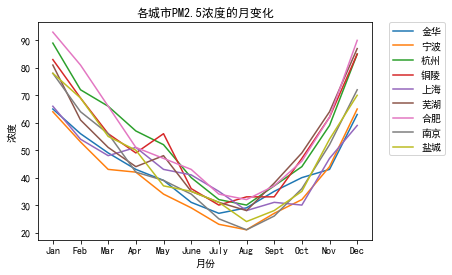

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus'] = False 

data=[[65,56,49,43,39,31,27,29,35,40,43,63],
[64,53,43,42,34,29,23,21,27,32,44,65],
[89,72,66,57,52,40,32,30,37,44,59,85],
[83,69,56,49,56,36,30,33,33,47,62,85],
[66,54,48,51,43,41,35,28,31,30,47,59],
[81,61,51,44,48,35,31,28,38,49,64,87],
[93,81,66,51,47,43,34,32,37,46,62,90],
[78,64,56,42,39,34,25,21,26,36,52,72],
[78,69,55,50,37,35,31,24,28,35,54,70]]

frame = pd.DataFrame(data,index=["金华","宁波","杭州","铜陵","上海","芜湖","合肥","南京","盐城"])

frame.T.plot()

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"])
plt.title('各城市PM2.5浓度的月变化')
plt.ylabel(u"浓度")
plt.xlabel(u"月份")

# plt.legend() 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=0, borderaxespad=0)

#plt.legend(['金华','宁波','杭州','铜陵','上海','芜湖','合肥','南京','盐城'])
# plt.savefig('acc_plot1.png')
plt.show()
plt.close()


# 实习五

练习GeoPandas操作，包括读写shapefile文件、几何对象操作、记录选取、图层绘制等。

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


68
2
     Id city_name     Lon    Lat  \
0     0       厦门市  118.10  24.47   
1     0       乃东县   91.77  29.23   
2     0      日喀则市   88.88  29.28   
3     0       林芝县   94.48  29.57   
4     0       昌都县   97.17  31.14   
5     0       那曲县   92.06  31.48   
6     0       安康市  109.02  32.70   
7     0       玉树县   97.01  33.01   
8     0       汉中市  107.02  33.08   
9     0        成县  105.73  33.74   
10    0       商州市  109.93  33.87   
11    0       咸阳市  108.72  34.35   
12    0       宝鸡市  107.11  34.37   
13    0       玛沁县  100.24  34.47   
14    0       渭南市  109.51  34.50   
15    0       天水市  105.72  34.58   
16    0       合作镇  102.91  34.99   
17    0       铜川市  109.07  35.07   
18    0       同仁县  102.01  35.51   
19    0       平凉市  106.70  35.53   
20    0       定西县  104.62  35.58   
21    0       临夏市  103.21  35.60   
22    0       西峰市  107.64  35.74   
23    0       共和县  100.62  36.28   
24    0       平安县  102.11  36.50   
25    0       白银市  104.19  36.55   
26    0       海晏县  100.

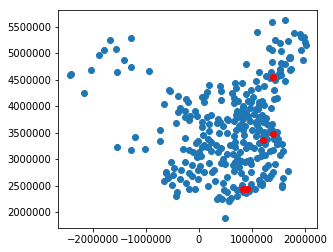

In [47]:
import geopandas as gpd
import numpy as npy
data = gpd.GeoDataFrame.from_file("china_city/china_city.shp",encoding="utf8")
# print(data)
ax = data.plot()
# print(ax1)
count = []
for point in data["geometry"]:   
    buffers = point.buffer(100000)
    c = data.within(buffers)
    city_sum = c.sum()
    count.append(city_sum)        
data["count"] = count
print(npy.argmax(data["count"], axis=0))
city = data[data["count"] == data["count"].max()]
for i in range(len(data['count'])):
    if data['count'][i]==191:
        print(i)
print(data["count"][227])
city.plot(ax=ax,color='red')
data.to_file("china_city\city.shp",encoding='utf8') 
print(data)

# 实习六

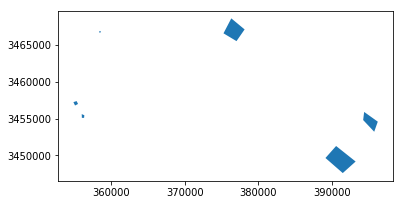

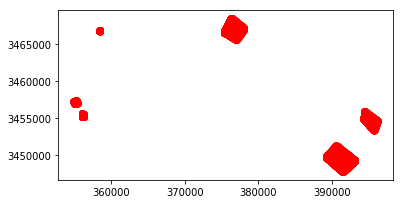

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


band0  band1  band2  band3  band4  band5  band6  band7  \
0      12589  12007  11742  11370   8346   7088   6707  11504   
1      12560  12000  11708  11357   8335   7096   6713  11504   
2      12572  12007  11687  11358   8340   7068   6696  11519   
3      12596  12005  11701  11342   8348   7060   6677  11522   
4      12574  11991  11680  11353   8358   7064   6660  water   
5      12536  11978  11675  11330   8323   7036   6656  water   
6      12556  11961  11704  11345   8330   7054   6666  water   
7      12620  11986  11715  11398   8378   7087   6693  11597   
8      12633  12022  11727  11373   8420   7069   6697  11514   
9      12564  12013  11657  11330   8322   7069   6678  water   
10     12531  11981  11677  11343   8291   7064   6685  water   
11     12524  11941  11636  11307   8290   7039   6659  water   
12     12566  11993  11707  11332   8343   7093   6698  water   
13     12574  12013  11714  11313   8320   7083   6713  11575   
14     12600  12002  11695  11360   8380   7074   6697  11517   
15     12618  12017  11725  11370   8406   7069   6686  water   
16     12541  11986  11680  11334   8290   7077   6697  water   
17     12529  11973  11710  11352   8333   7071   6686  water   
18     12525  11951  11670  11309   8336   7039   6684  water   
19     12538  11977  11722  11333   8339   7053   6683  water   
20     12518  11931  11656  11304   8282   6988   6646  water   
21     12537  11998  11722  11347   8303   7091   6710  11458   
22     12565  12010  11732  11335   8336   7141   6740  water   
23     12576  11993  11707  11325   8301   7082   6681  water   
24     12547  11983  11680  11328   8277   7056   6665  water   
25     12538  11953  11637  11317   8266   7040   6665  water   
26     12528  11958  11644  11302   8268   7046   6642  water   
27     12535  11963  11673  11316   8314   7027   6628  water   
28     12516  11940  11636  11301   8298   6990   6609  water   
29     12508  11923  11642  11302   8279   6972   6616  water   
...      ...    ...    ...    ...    ...    ...    ...    ...   
16441  13210  12810  12785  12633   9093   7451   6979  water   
16442  13180  12776  12756  12588   9015   7366   6921  water   
16443  13202  12794  12778  12595   9029   7420   6980  water   
16444  13194  12815  12766  12563   9023   7438   6982  water   
16445  13263  12829  12803  12660   9102   7448   7031  water   
16446  13228  12845  12849  12682   9145   7469   6994  water   
16447  13181  12797  12786  12615   9069   7428   6982  water   
16448  13224  12840  12826  12689   9101   7512   7039  water   
16449  13211  12822  12797  12655   9096   7516   7036  water   
16450  13217  12821  12826  12680   9061   7468   6994  water   
16451  13267  12834  12832  12675   9065   7437   6998  water   
16452  13189  12774  12750  12645   8989   7413   6933  water   
16453  13193  12787  12752  12590   9073   7401   6959  water   
16454  13212  12798  12760  12620   9035   7429   6956  water   
16455  13238  12848  12797  12655   9118   7511   7034  water   
16456  13224  12840  12832  12679   9139   7486   7026  water   
16457  13223  12827  12818  12650   9108   7489   7046  water   
16458  13240  12809  12804  12645   9086   7470   7010  water   
16459  13219  12817  12773  12648   9085   7434   6968  water   
16460  13192  12783  12754  12618   9053   7420   6964  water   
16461  13187  12777  12747  12567   9015   7460   6993  water   
16462  13223  12809  12781  12621   9082   7493   7012  water   
16463  13236  12819  12829  12663   9091   7490   7040  water   
16464  13233  12840  12821  12679   9132   7499   7035  water   
16465  13224  12810  12797  12643   9105   7487   7016  water   
16466  13218  12769  12755  12629   9039   7419   6982  water   
16467  13214  12803  12834  12642   9099   7494   7041  water   
16468  13249  12847  12824  12661   9119   7505   7033  water   
16469  13242  12861  12846  12690   9175   7506   7058  water   
16470  13275  12868  12831  12647   9108  

In [6]:
import geopandas as gpd
from osgeo import gdal
from osgeo import gdal_array
import numpy as np
import pylab
from shapely.geometry import Point
import matplotlib.pyplot as plt
s_f='sample_regions/sample_regions.shp'
l_f='landsat8_20180523/20180523.img'
sample_regions =gpd.read_file(s_f)
landsat=gdal.Open(l_f)
sample_regions.plot()
plt.show()
outFile = 'das.img' # 输出结果
# 裁剪
a=gdal.Warp(outFile, l_f, format='GTiff', cutlineDSName=s_f,
          dstNodata=65535)
ds = gdal.Open(outFile)
data=ds.ReadAsArray()
zuobiao=np.where(data[0]!=65535)
points=[]
for i in range(len(zuobiao[0])):
    shuju=dict(band0=data[0,zuobiao[0][i],zuobiao[1][i]],
              band1=data[1,zuobiao[0][i],zuobiao[1][i]],
              band2=data[2,zuobiao[0][i],zuobiao[1][i]],
              band3=data[3,zuobiao[0][i],zuobiao[1][i]],
              band4=data[4,zuobiao[0][i],zuobiao[1][i]],
              band5=data[5,zuobiao[0][i],zuobiao[1][i]],
              band6=data[6,zuobiao[0][i],zuobiao[1][i]],
             band7=data[7,zuobiao[0][i],zuobiao[1][i]],)
    points.append(shuju)
# for i in range(len(sample_regions.geometry)):
#     boundaryx.append(sample_regions.geometry[i].boundary.xy[0])
#     boundaryy.append(sample_regions.geometry[i].boundary.xy[1])
from osgeo import gdal
def Pixel2world( line, column,geotransform=ds.GetGeoTransform()):
    originX = geotransform[0]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    pixelHeight = geotransform[5]
    x = column*pixelWidth + originX - pixelWidth/2
    y = line*pixelHeight + originY - pixelHeight/2
    return(x,y)
zuobiaoxy=Pixel2world(zuobiao[0],zuobiao[1])
zuobiaoxy[0].shape
xy = [Point(xy) for xy in zip(zuobiaoxy[0],zuobiaoxy[1])]
pts = gpd.GeoSeries(xy)
gdf = gpd.GeoDataFrame(points, geometry=xy)
gdf.plot(color='red')
plt.show()
for i in range(6):
    a=np.where(gdf.geometry.within(sample_regions.geometry[i]))
    if (i==0 or i==1):
        for j in range(len(a)):
            gdf.band7[a[j]]='water'
    elif (i==2 or i==3):
        for j in range(len(a)):
            gdf.band7[a[j]]='vrge'
    elif (i==4 or i==5):
        for j in range(len(a)):
            gdf.band7[a[j]]='urban'
gdf